<a href="https://colab.research.google.com/github/Akmazad/Data-Science-Fundamentals-in-R/blob/main/Modules/Module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Module 4: Visualization - with `ggplot2`#


---


**Contents:**

*   barplot
*   histogram
*   correlation plot
*   boxplot
*   violin plot
*   scatter
*   lineplot
*   heatmap


---









In [ ]:
library(ggplot2)
library(dplyr)
library(plotly)
library(GGally)



---

### Barplot ###


---



In [ ]:
# ref: https://r-graph-gallery.com/218-basic-barplots-with-ggplot2.html
# Load ggplot2
library(ggplot2)

# Create data
data <- data.frame(
  name=c("A","B","C","D","E") ,  # 'name' will be the x-axis label
  value=c(3,12,5,18,45)          # 'value' will be the y-axis label
)

# Barplot
data %>% ggplot(aes(x=name, y=value)) +
  geom_bar(stat = "identity") # it tells, y-axis to be just the value from the value column



---

### Histogram ###


---



In [ ]:
# library
library(ggplot2)

# dataset:
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/1_OneNum.csv", header=TRUE)

# plot
p <- data %>%
  filter( price<300 ) %>%
  ggplot( aes(x=price)) +
    geom_histogram( binwidth=3, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Bin size = 3") +
    theme(
      plot.title = element_text(size=15)
    )
p



---
### Boxplot - (also used for Outlier Detection) ###


---




In [ ]:
library(ggplot2)

# Change outlier, color, shape and size
p <- ggplot(ToothGrowth, aes(group=dose, y=len)) +
            geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4) +
              theme(axis.text.y = element_blank())
p

# saving the plot as a png file
#ggsave("temp.png", plot = p)



---
### Violin plot ###


---




In [ ]:
# Library
library(ggplot2)

# create a dataset
data <- data.frame(
  name=c( rep("A",500), rep("B",500), rep("B",500), rep("C",20), rep('D', 100)  ),
  value=c( rnorm(500, 10, 5), rnorm(500, 13, 1), rnorm(500, 18, 1), rnorm(20, 25, 4), rnorm(100, 12, 1) )
)

# Most basic violin chart
p <- ggplot(data, aes(x=name, y=value, fill=name)) + # fill=name allow to automatically dedicate a color for each group
  geom_violin()

p



---
### Density plot ###


---




,sex,weight
,<fct>,<dbl>
1,F,49
2,F,56
3,F,60
4,F,43
5,F,57
6,F,58


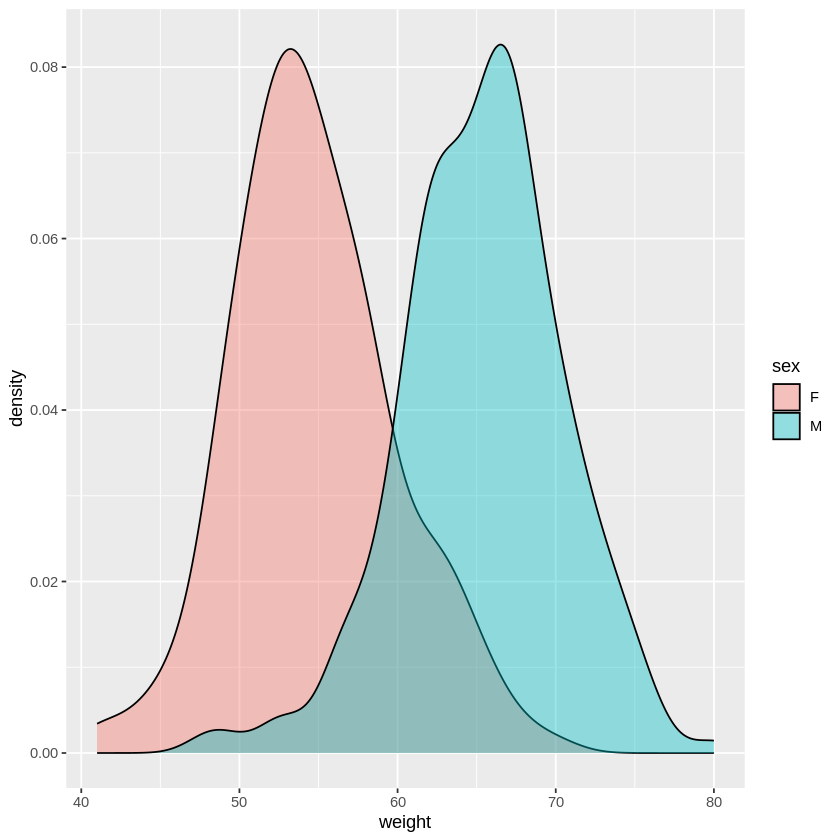

In [ ]:
set.seed(1234)
df <- data.frame(
  sex=factor(rep(c("F", "M"), each=200)),
  weight=round(c(rnorm(200, mean=55, sd=5),
                 rnorm(200, mean=65, sd=5)))
  )
head(df)

# Use semi-transparent fill
p<-ggplot(df, aes(x=weight, fill=sex)) +
  geom_density(alpha=0.4)
p



---
### Ridgeline plot ###


---




In [ ]:
# library
library(ggridges)
library(ggplot2)

# Diamonds dataset is provided by R natively
head(diamonds)

# basic example
ggplot(diamonds, aes(x = price, y = cut, fill = cut)) +
  geom_density_ridges() +
  theme_ridges() +
  theme(legend.position = "none")



---
### Scatter plot ###


---




In [ ]:
# ref: http://www.sthda.com/english/wiki/ggplot2-scatter-plots-quick-start-guide-r-software-and-data-visualization

library(ggplot2)
# Basic scatter plot
ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point()
# Change the point size, and shape
ggplot(mtcars, aes(x=wt, y=mpg)) +
  geom_point(size=2, shape=23)
# Add the regression line
ggplot(mtcars, aes(x=wt, y=mpg)) +
  geom_point()+
  geom_smooth(method=lm)



---
### line plot ###


---




In [ ]:
# http://www.sthda.com/english/wiki/ggplot2-line-plot-quick-start-guide-r-software-and-data-visualization
library(ggplot2)
# Basic line plot with points
ggplot(data=mtcars, aes(x=mtcars$cyl, y=mtcars$mpg, group=1)) +
  geom_line()+
  geom_point()
# Change the line type
ggplot(data=mtcars, aes(x=mtcars$cyl, y=mtcars$mpg, group=1)) +
  geom_line(linetype = "dashed")+
  geom_point()
# Change the color
ggplot(data=mtcars, aes(x=mtcars$cyl, y=mtcars$mpg, group=1)) +
  geom_line(color="red")+
  geom_point()



---
### Correlation plot ###


---




In [ ]:
# Quick display of two cabapilities of GGally, to assess the distribution and correlation of variables
library(GGally)

# Create data
data <- data.frame(
  v1 = 1:100 + rnorm(100,sd=20),
  v2 = 1:100 + rnorm(100,sd=27),
  v3 = rep(1, 100) + rnorm(100, sd = 1))
# add two more variables
data$v4 = data$v1 ** 2
data$v5 = -(data$v1 ** 2)

# Check correlation between variables
cor(data)

# Nice visualization of correlations
ggcorr(data, method = c("everything", "pearson"))



---
### Correlogram (Scatterplot matrix) plot ###
---




In [ ]:
# Quick display of two cabapilities of GGally, to assess the distribution and correlation of variables
library(GGally)

# Create data
data <- data.frame( var1 = 1:100 + rnorm(100,sd=20), v2 = 1:100 + rnorm(100,sd=27), v3 = rep(1, 100) + rnorm(100, sd = 1))
data$v4 = data$var1 ** 2
data$v5 = -(data$var1 ** 2)

# Check correlations (as scatterplots), distribution and print corrleation coefficient
ggpairs(data, title="correlogram with ggpairs()")



---
### Heatmap plot ###
---




In [ ]:
# The mtcars dataset:
data <- as.matrix(mtcars)

# Default Heatmap
heatmap(data)

# scaled Heatmap
heatmap(data, scale = "column")